In [16]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from pandas import ExcelFile

In [4]:
fm = mp.font_manager.FontManager()
#한글 지원하는 폰트명으로 재할당
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rc('font', family='Malgun Gothic')

In [5]:
df_data = pd.read_csv('반려동물등록대행업체현황.csv', encoding='cp949')
df_data.head()

,시군명,업체명,도로명주소,지번주소,우편번호,전화번호,WGS84위도,WGS84경도
0,가평군,가평가축병원,NaN,경기도 가평군 가평읍 대곡리 230번지 3호,12420.0,031-582-2412,37.825038,127.514124
1,가평군,가평축산농협 동물병원,NaN,경기도 가평군 가평읍 대곡리,NaN,031-582-4111,NaN,NaN
2,가평군,경기 동물병원,경기도 가평군 청평면 청평중앙로 8,경기도 가평군 청평면 청평리 438-23번지 경기동물병원,12453.0,031-584-1282,37.735850,127.415936
3,가평군,선진가축병원(산업동물출장진료전문병원),경기도 가평군 가평읍 향교로 3,경기도 가평군 가평읍 읍내리 535번지 2호,12417.0,070-8739-6388,37.829437,127.510432
4,가평군,설악동물병원,경기도 가평군 설악면 신천중앙로 117,경기도 가평군 설악면 신천리 454번지 3호,12467.0,031-584-3063,37.677960,127.490633


In [6]:
# 시군구명 확인
df_data['시군명'].unique()

array(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시'], dtype=object)

In [7]:
# 결측치 
df_data.isnull().sum()

시군명         0
업체명         0
도로명주소      94
지번주소        0
우편번호       31
전화번호       68
WGS84위도    27
WGS84경도    27
dtype: int64

In [8]:
# 결측치 시각화 설치
!pip install missingno

In [12]:
# 결측시를 시각화
import missingno as msno

<AxesSubplot:>

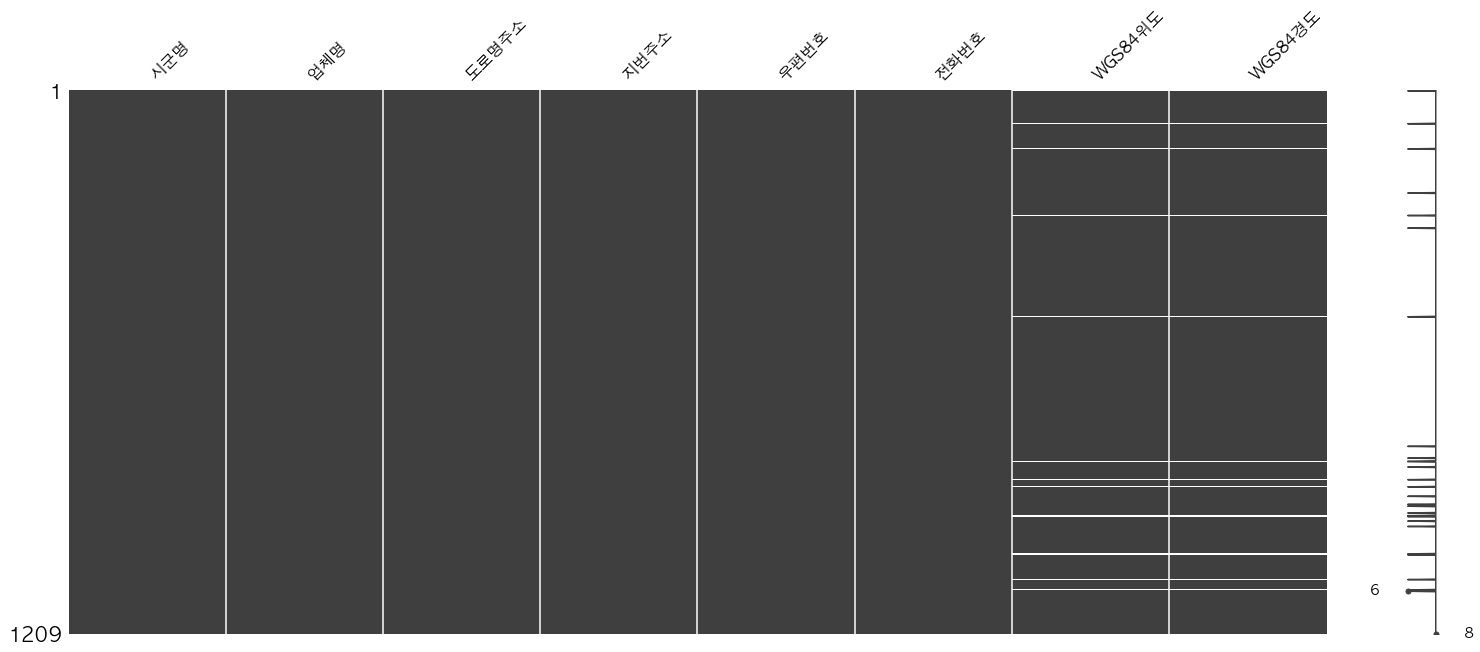

In [17]:
msno.matrix(df_data)

In [14]:
# 위도와 경도를 제와한 결측치 처리
df_data['도로명주소'] = df_data['도로명주소'].fillna('업체명으로 검색해서 확인하세요')
df_data['우편번호'] = df_data['우편번호'].fillna('업체명으로 검색해서 확인하세요')
df_data['전화번호'] = df_data['전화번호'].fillna('업체명으로 검색해서 확인하세요')

<AxesSubplot:>

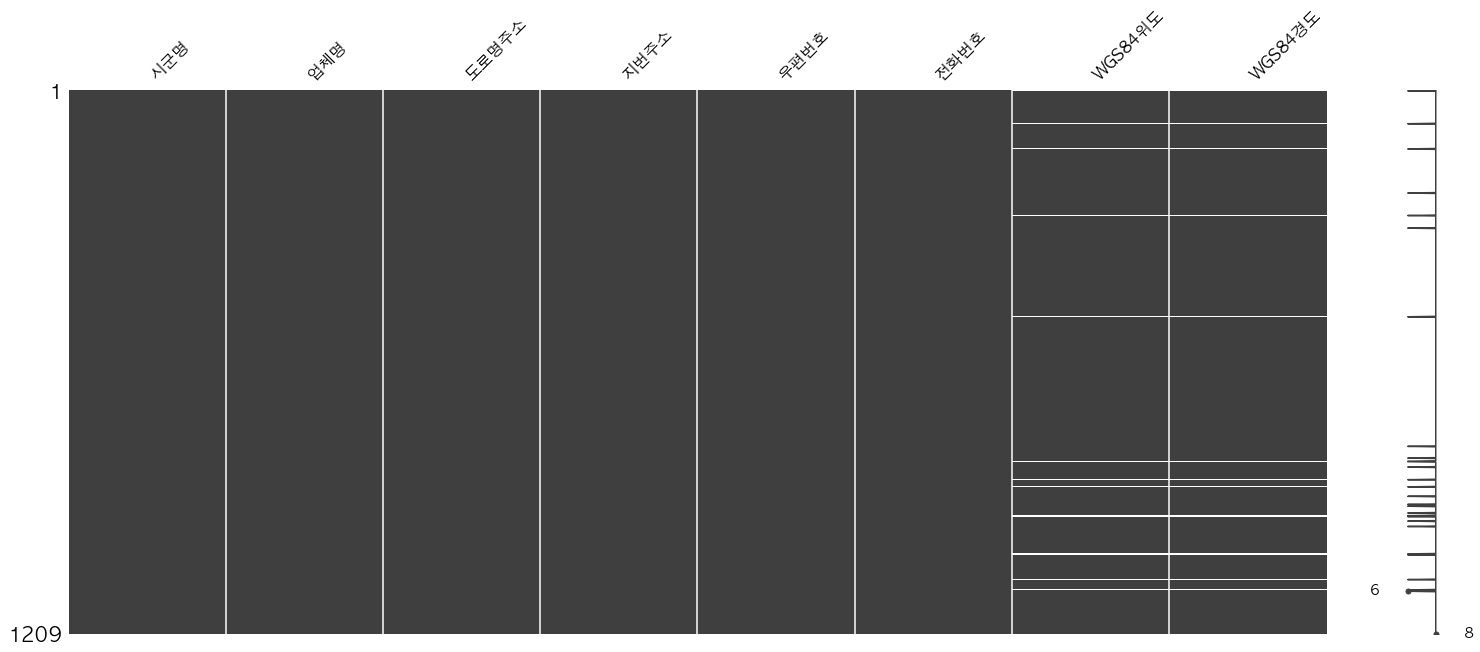

In [18]:
# 결측치 다시 확인
msno.matrix(df_data)

In [19]:
# 위도와 경도 결측치 값 제거
df_data_row = df_data.dropna(axis=0)

In [20]:
!pip install folium

In [21]:
import folium

In [72]:
map = folium.Map(
      location=[df_data_row['WGS84위도'].mean(), 
                df_data_row['WGS84경도'].mean()],
      zoom_start=12,)
    
for n in df_data_row.index:
    # 팝업에 들어갈 텍스를 지정해 준다.
    popup_name = df_data_row.loc[n,'업체명'] + ' - '\
    + df_data_row.loc[n,'지번주소']

     # 브랜드명에 따라 아이콘 색상을 다르게 준다.
    if df_data_row.loc[n,'시군명']=='가평군':
        icon_color = '#EA96A3'
    else:
        icon_color = 'blue'
    
    folium.CircleMarker(
         location=[df_data_row.loc[n,'WGS84위도'],df_data_row.loc[n,'WGS84경도']],
         radius =2,
         popup = popup_name,
         color = icon_color,
         fill = True,
         fill_color=icon_color,
         
    ).add_to(map)

In [73]:
map

In [34]:
map.save('./df_map.html')

<AxesSubplot:xlabel='시군명', ylabel='count'>

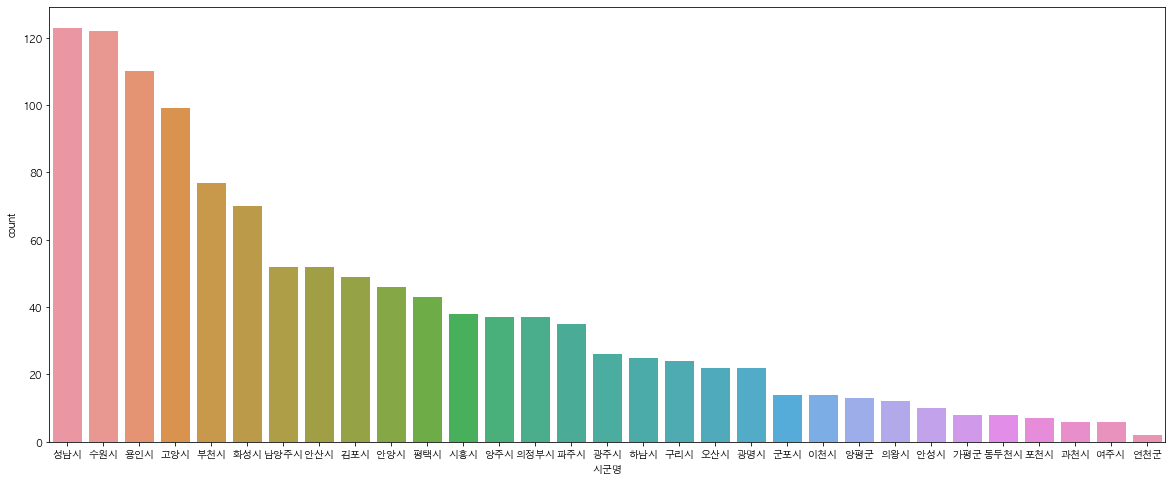

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_data, x="시군명", order = df_data["시군명"].value_counts().index)

<AxesSubplot:xlabel='WGS84경도', ylabel='WGS84위도'>

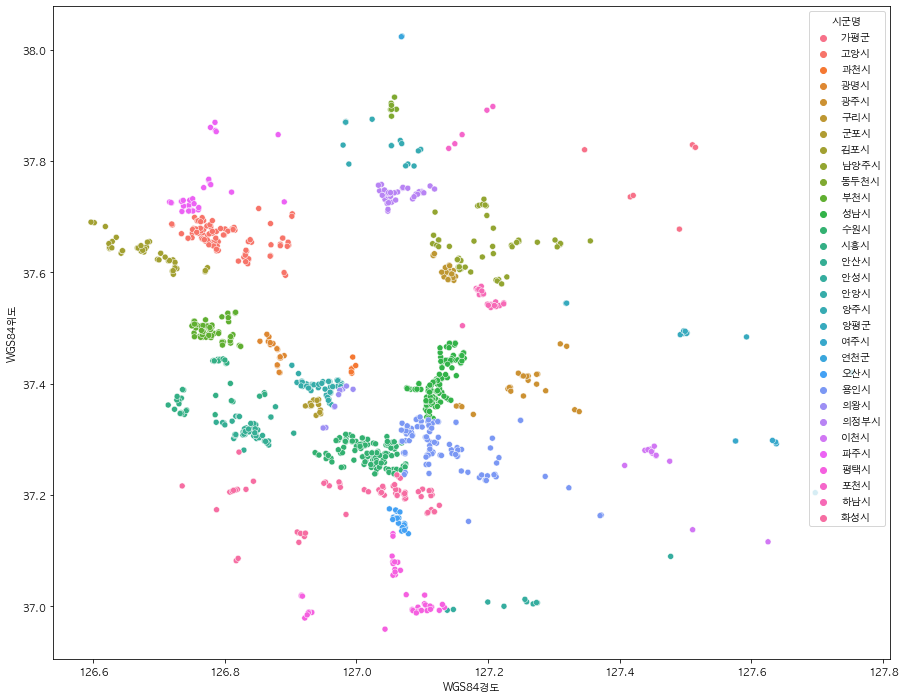

In [43]:
plt.figure(figsize=(15,12))
sns.scatterplot(data = df_data, x="WGS84경도", y="WGS84위도", hue="시군명")

In [54]:
import folium
m = folium.Map(
    location=[37.566345, 126.977893],
    tiles = 'Stamen Terrain'
)
m